# 호텔 예약 취소 여부 예측

호텔 예약 데이터를 읽어들여 데이터를 분석 및 전처리한 후 머신러닝과 딥러닝으로 호텔 예약 취소 여부를 예측하고 결과를 분석하세요.

### 비시각화 데이터 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv("hotel_bookings.csv")

# 데이터 구조 확인
print(df.info()) 
print(df.shape)
print(df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   stays_in_weekend_nights         119390 non-null  int64  
 6   stays_in_week_nights            119390 non-null  int64  
 7   adults                          119390 non-null  int64  
 8   children                        119386 non-null  float64
 9   babies                          119390 non-null  int64  
 10  meal                            119390 non-null  object 
 11  country                         118902 non-null  object 
 12  market_segment  

In [2]:
# 데이터 요약(통계) 확인
print(df.describe()) 

          Unnamed: 0    is_canceled      lead_time  arrival_date_week_number  \
count  119390.000000  119390.000000  119390.000000             119390.000000   
mean    59694.500000       0.370416     104.011416                 27.165173   
std     34465.068657       0.482918     106.863097                 13.605138   
min         0.000000       0.000000       0.000000                  1.000000   
25%     29847.250000       0.000000      18.000000                 16.000000   
50%     59694.500000       0.000000      69.000000                 28.000000   
75%     89541.750000       1.000000     160.000000                 38.000000   
max    119389.000000       1.000000     737.000000                 53.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.57926

In [3]:
# 타겟변수 분포 확인
print(df['is_canceled'].value_counts())

0    75166
1    44224
Name: is_canceled, dtype: int64


In [4]:
# 결측치 탐색
print(df.isnull().sum()) 

Unnamed: 0                             0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_week_number               0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [ ]:
# 이상치 탐색: lead_time이 600 이상인 행 확인
print(df[df['lead_time'] > 600])

In [5]:
# 파생변수 생성
df['arrival_date_Year'] = df['arrival_date'].str.split('-').str[0]
df['arrival_date_Month'] = df['arrival_date'].str.split('-').str[1]
df['arrival_date_Day_of_month'] = df['arrival_date'].str.split('-').str[2]

# 원본 변수 삭제
df.drop('arrival_date', axis=1, inplace=True)
df

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_Year,arrival_date_Month,arrival_date_Day_of_month
0,0,Resort Hotel,0,342,27,0,0,2,0.0,0,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015,July,1
1,1,Resort Hotel,0,737,27,0,0,2,0.0,0,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015,July,1
2,2,Resort Hotel,0,7,27,0,1,1,0.0,0,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015,July,1
3,3,Resort Hotel,0,13,27,0,1,1,0.0,0,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015,July,1
4,4,Resort Hotel,0,14,27,0,2,2,0.0,0,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015,July,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,City Hotel,0,23,35,2,5,2,0.0,0,...,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017,August,30
119386,119386,City Hotel,0,102,35,2,5,3,0.0,0,...,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017,August,31
119387,119387,City Hotel,0,34,35,2,5,2,0.0,0,...,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017,August,31
119388,119388,City Hotel,0,109,35,2,5,2,0.0,0,...,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017,August,31


In [6]:
# 상관계수 계산
correlation_matrix = df.corr()
print(correlation_matrix)

                                Unnamed: 0  is_canceled  lead_time  \
Unnamed: 0                        1.000000    -0.242238   0.006708   
is_canceled                      -0.242238     1.000000   0.293123   
lead_time                         0.006708     0.293123   1.000000   
arrival_date_week_number         -0.053586     0.008148   0.126871   
stays_in_weekend_nights          -0.147381    -0.001791   0.085671   
stays_in_week_nights             -0.205002     0.024765   0.165799   
adults                           -0.010250     0.060017   0.119519   
children                         -0.020066     0.005048  -0.037622   
babies                           -0.027776    -0.032491  -0.020915   
is_repeated_guest                -0.018180    -0.084793  -0.124410   
previous_cancellations           -0.018089     0.110133   0.086042   
previous_bookings_not_canceled   -0.000193    -0.057358  -0.073548   
booking_changes                  -0.006700    -0.144381   0.000149   
agent               

### 시각화 데이터 분석

In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc("font", family="NanumGothicCoding")

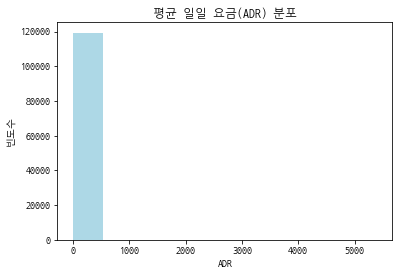

In [8]:
# 히스토그램 : 평균 일일 요금(ADR) 분포 확인
plt.hist(df['adr'], bins=10, color='lightblue')
plt.title('평균 일일 요금(ADR) 분포')
plt.xlabel('ADR')
plt.ylabel('빈도수')
plt.show()

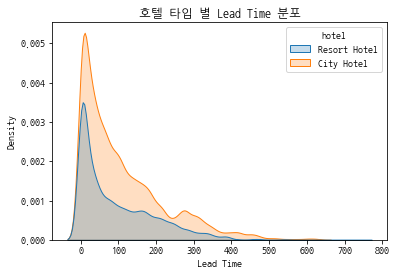

In [9]:
# KDE plot : Lead time 컬럼의 분포 확인
sns.kdeplot(data=df, x='lead_time', hue='hotel', fill=True)
plt.title('호텔 타입 별 Lead Time 분포')
plt.xlabel('Lead Time')
plt.ylabel('Density')
plt.show()

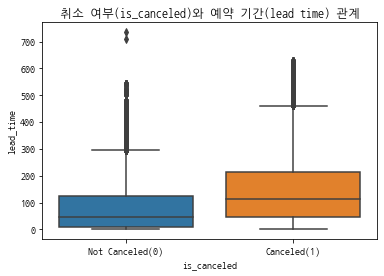

In [10]:
# 박스플롯 : 예약 취소 여부에 따른 예약기간 분포 및 이상치 확인
sns.boxplot(data=df, x='is_canceled', y='lead_time')
plt.title('취소 여부(is_canceled)와 예약 기간(lead time) 관계')
plt.xlabel('is_canceled')
plt.ylabel('lead_time')
plt.xticks(ticks=[0, 1], labels=['Not Canceled(0)', 'Canceled(1)'])
plt.show()


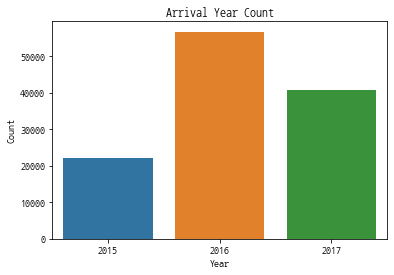

In [11]:
# 카운트플롯 : Arrival Year 컬럼의 분포 확인
sns.countplot(data=df, x='arrival_date_Year')
plt.title('Arrival Year Count')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

/home/iknow/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/seaborn/utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/home/iknow/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


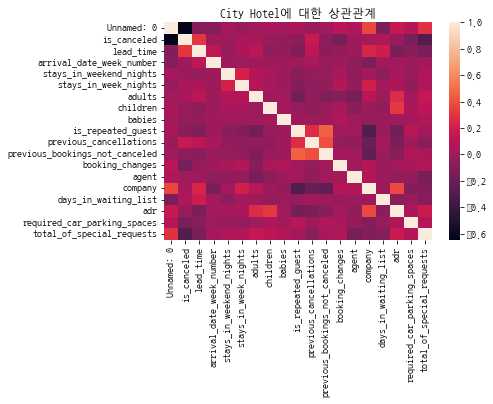

                                Unnamed: 0  is_canceled  lead_time  \
Unnamed: 0                        1.000000    -0.647099  -0.095606   
is_canceled                      -0.647099     1.000000   0.309242   
lead_time                        -0.095606     0.309242   1.000000   
arrival_date_week_number         -0.087419     0.001580   0.130392   
stays_in_weekend_nights           0.021416    -0.007343  -0.023913   
stays_in_week_nights             -0.022026     0.048704   0.058361   
adults                            0.013276     0.053054   0.115792   
children                          0.042971    -0.027075  -0.053567   
babies                            0.015424    -0.030186  -0.030333   
is_repeated_guest                 0.042707    -0.065840  -0.107900   
previous_cancellations           -0.011967     0.166643   0.122511   
previous_bookings_not_canceled    0.009582    -0.053134  -0.065472   
booking_changes                   0.102861    -0.149500  -0.031052   
agent               

In [13]:
# 히트맵 : 수치형 변수들 간의 상관관계를 시각화
city_corr = df[df["hotel"] == "City Hotel"].select_dtypes(include=[float, int]).corr()
sns.heatmap(city_corr)
plt.title('City Hotel에 대한 상관관계')
plt.show()

# 상관계수 값 확인
print(df[df["hotel"] == "City Hotel"].select_dtypes(include=[float, int]).corr())

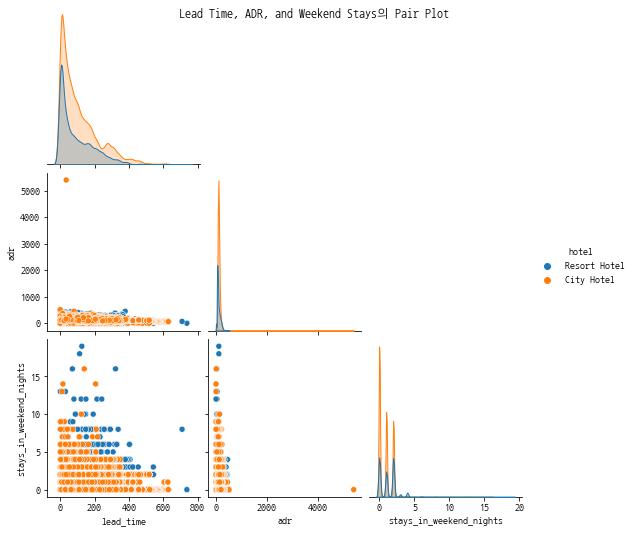

In [14]:
# Pair plot : 수치형 변수들 간의 산점도와 히스토그램을 동시에 시각화
sns.pairplot(df, vars=['lead_time', 'adr', 'stays_in_weekend_nights'], \
                                                 hue='hotel', corner=True)
plt.suptitle('Lead Time, ADR, and Weekend Stays의 Pair Plot')
plt.show()

### 데이터 전처리

In [15]:
# 결측값 개수 확인
print("결측값 확인:")
print(df.isnull().sum())

# 결측치 처리 : (결측치가 많아 의미 없는) 열 제거
df_na = df.drop("company", axis=1)

# 결측치 처리 : (결측값이 포함된) 행 제거
df_na.dropna(inplace=True)
print(f"결측값 제거 후 데이터 크기: {df_na.shape}")

# 전체 결측치 개수 확인
total_na = df_na.isnull().sum().sum()
print(f"전체 결측값 개수: {total_na}")

결측값 확인:
Unnamed: 0                             0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_week_number               0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer

In [16]:
# 불필요한 열 제거
df_del = df_na.drop(["Unnamed: 0", "reservation_status", \
                                     "reservation_status_date"], axis=1)

# 결과 확인
print(f"불필요한 변수 제거 후 데이터 크기: {df_del.shape}")

불필요한 변수 제거 후 데이터 크기: (102894, 30)


In [17]:
# Scikit-learn 활용한 원-핫 인코딩

# 범주형 변수 확인
obj_columns = df_del.dtypes[df_del.dtypes == 'object'].index
print(f"Sklearn 범주형 변수: {obj_columns.tolist()}")

print("Scikit-learn 원-핫 인코딩 전")
print(df_del)

## One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder # 라이브러리 임포트

encoder = OneHotEncoder() # 인코더 객체 불러오기
encoded_features = encoder.fit_transform(df_del[obj_columns])

# 인코딩된 데이터프레임 생성
df_encoded = pd.DataFrame(encoded_features.toarray())

# 원래 데이터프레임과 결합
df_sklearn_encoded = pd.concat([df_del.drop(columns=obj_columns), \
                                                        df_encoded])

print(f"Sklearn: One-Hot Encoding 후 데이터 크기: {df_sklearn_encoded.shape}")
print("Scikit-learn 원-핫 인코딩 후")
print(df_sklearn_encoded)

Sklearn 범주형 변수: ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'arrival_date_Year', 'arrival_date_Month', 'arrival_date_Day_of_month']
Scikit-learn 원-핫 인코딩 전
        Unnamed: 0         hotel  is_canceled  lead_time  \
3                3  Resort Hotel            0         13   
4                4  Resort Hotel            0         14   
5                5  Resort Hotel            0         14   
7                7  Resort Hotel            0          9   
8                8  Resort Hotel            1         85   
...            ...           ...          ...        ...   
119385      119385    City Hotel            0         23   
119386      119386    City Hotel            0        102   
119387      119387    City Hotel            0         34   
119388      119388    City Hotel            0        109   
119389      119389    City Hotel            0        205   

        arrival_date

In [18]:
# Pandas를 활용한 원-핫 인코딩
obj_columns = df_del.dtypes[df_del.dtypes == 'object'].index
print(f"Pandas 범주형 변수: {obj_columns.tolist()}")

print("Pandas 원-핫 인코딩 전")
print(df_del)

df_pandas_encoded = pd.get_dummies(data=df_del, columns=obj_columns)
print(f"Pandas: One-Hot Encoding 후 데이터 크기: {df_pandas_encoded.shape}")

print("Pandas 원-핫 인코딩 후")
print(df_pandas_encoded)

Pandas 범주형 변수: ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'arrival_date_Year', 'arrival_date_Month', 'arrival_date_Day_of_month']
Pandas 원-핫 인코딩 전
        Unnamed: 0         hotel  is_canceled  lead_time  \
3                3  Resort Hotel            0         13   
4                4  Resort Hotel            0         14   
5                5  Resort Hotel            0         14   
7                7  Resort Hotel            0          9   
8                8  Resort Hotel            1         85   
...            ...           ...          ...        ...   
119385      119385    City Hotel            0         23   
119386      119386    City Hotel            0        102   
119387      119387    City Hotel            0         34   
119388      119388    City Hotel            0        109   
119389      119389    City Hotel            0        205   

        arrival_date_week_n

Pandas: One-Hot Encoding 후 데이터 크기: (102894, 281)
Pandas 원-핫 인코딩 후
        Unnamed: 0  is_canceled  lead_time  arrival_date_week_number  \
3                3            0         13                        27   
4                4            0         14                        27   
5                5            0         14                        27   
7                7            0          9                        27   
8                8            1         85                        27   
...            ...          ...        ...                       ...   
119385      119385            0         23                        35   
119386      119386            0        102                        35   
119387      119387            0         34                        35   
119388      119388            0        109                        35   
119389      119389            0        205                        35   

        stays_in_weekend_nights  stays_in_week_nights  adults  childr

In [19]:
# 본 실습에서는 pandas를 이용해 인코딩한 결과를 사용합니다.
df_encoded = df_pandas_encoded.copy()

In [20]:
# X, y 분리
X = df_encoded.drop(columns=['is_canceled'])  
y = df_encoded['is_canceled']               

In [21]:
# 학습데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, \
                                            test_size=0.2, random_state=42)

print(f"X_train 크기: {X_train.shape}, X_valid 크기: {X_valid.shape}")
print(f"y_train 크기: {y_train.shape}, y_valid 크기: {y_valid.shape}")

X_train 크기: (82315, 280), X_valid 크기: (20579, 280)
y_train 크기: (82315,), y_valid 크기: (20579,)


In [22]:
## Min-Max Scaling
# 라이브러리 임포트
from sklearn.preprocessing import MinMaxScaler 

print("정규화 스케일링 전")
print(X_train)

# 스케일러 객체 불러오기
scaler = MinMaxScaler() 
X_train_ms = scaler.fit_transform(X_train)
X_valid_ms = scaler.transform(X_valid)

print("정규화 스케일링 후")
print(X_train_ms)

정규화 스케일링 전
        Unnamed: 0  lead_time  arrival_date_week_number  \
83934        83934         10                         7   
97307        97307        121                        37   
106443      106443        258                         8   
76470        76470        379                        44   
26501        26501        193                        30   
...            ...        ...                       ...   
7425          7425        161                        33   
64977        64977         56                        12   
90516        90516        247                        24   
954            954         51                        32   
19934        19934          0                         2   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
83934                         1                     2       2       0.0   
97307                         2                     4       2       1.0   
106443                        0                     1  

In [23]:
## Standard Scaling
# 라이브러리 임포트
from sklearn.preprocessing import StandardScaler 

print("표준화 스케일링 전")
print(X_train)

# 스케일러 객체 불러오기
scaler = StandardScaler() 
X_train_ss = scaler.fit_transform(X_train)
X_valid_ss = scaler.transform(X_valid)

print("표준화 스케일링 후")
print(X_train_ss)

표준화 스케일링 전
        Unnamed: 0  lead_time  arrival_date_week_number  \
83934        83934         10                         7   
97307        97307        121                        37   
106443      106443        258                         8   
76470        76470        379                        44   
26501        26501        193                        30   
...            ...        ...                       ...   
7425          7425        161                        33   
64977        64977         56                        12   
90516        90516        247                        24   
954            954         51                        32   
19934        19934          0                         2   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
83934                         1                     2       2       0.0   
97307                         2                     4       2       1.0   
106443                        0                     1  

In [24]:
# 본 실습에서는 표준화 스케일링한 결과를 사용합니다.
X_train = X_train_ss.copy()
X_valid = X_valid_ss.copy()

### 머신러닝 모델링

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score

# 모델 정의
logistic_model = LogisticRegression(random_state=42)

# 모델 학습
logistic_model.fit(X_train, y_train)

# 예측
y_pred = logistic_model.predict(X_valid)

# 모델 평가
print("로지스틱 회귀 모델 정확도(accuracy):", accuracy_score(y_valid, y_pred))
print("로지스틱 회귀 모델 정밀도(precision):", precision_score(y_valid, y_pred))
print("로지스틱 회귀 모델 재현율(recall):", recall_score(y_valid, y_pred))
print("로지스틱 회귀 모델 f1_score:", f1_score(y_valid, y_pred))

로지스틱 회귀 모델 정확도(accuracy): 0.9599105884639682
로지스틱 회귀 모델 정밀도(precision): 0.9348139255702281
로지스틱 회귀 모델 재현율(recall): 0.9650514314041393
로지스틱 회귀 모델 f1_score: 0.9496920543935605


/home/iknow/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score

# 모델 정의
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# 모델 학습
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_valid)

# 모델 평가
print("랜덤포레스트 모델 정확도(accuracy):", accuracy_score(y_valid, y_pred))
print("랜덤포레스트 모델 정밀도(precision):", precision_score(y_valid, y_pred))
print("랜덤포레스트 모델 정밀도(recall):", recall_score(y_valid, y_pred))
print("랜덤포레스트 모델 정밀도(f1_score):", f1_score(y_valid, y_pred))

랜덤포레스트 모델 정확도(accuracy): 0.9849846931337771
랜덤포레스트 모델 정밀도(precision): 0.9848787803049238
랜덤포레스트 모델 정밀도(recall): 0.9767009542694262
랜덤포레스트 모델 정밀도(f1_score): 0.9807728206085496


### 딥러닝 모델링

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# 딥러닝 모델 생성
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', \
                                          metrics=['accuracy'])

# 콜백 함수 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, \
                                           restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', \
                                                       save_best_only=True)

# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=50, batch_size=32,
    callbacks=[early_stopping, model_checkpoint]
)

# 모델 평가
loss, accuracy = model.evaluate(X_valid, y_valid)
print("딥러닝 모델 정확도:", accuracy)

2024-12-23 14:21:40.043677: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.6/lib64:/usr/local/cuda-11.6/lib64:
2024-12-23 14:21:40.043856: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.6/lib64:/usr/local/cuda-11.6/lib64:
2024-12-23 14:21:40.043868: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2024-12-23 14:21:41.561131: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda

Train on 82315 samples, validate on 20579 samples
Epoch 1/50
82315/82315 [==============================] - 10s 117us/sample - loss: 0.1904 - accuracy: 0.9246 - val_loss: 0.0861 - val_accuracy: 0.9688
Epoch 2/50
82315/82315 [==============================] - 9s 105us/sample - loss: 0.0845 - accuracy: 0.9685 - val_loss: 0.0673 - val_accuracy: 0.9734
Epoch 3/50
82315/82315 [==============================] - 9s 105us/sample - loss: 0.0685 - accuracy: 0.9741 - val_loss: 0.0594 - val_accuracy: 0.9760
Epoch 4/50
82315/82315 [==============================] - 9s 104us/sample - loss: 0.0622 - accuracy: 0.9763 - val_loss: 0.0598 - val_accuracy: 0.9757
Epoch 5/50
82315/82315 [==============================] - 9s 105us/sample - loss: 0.0574 - accuracy: 0.9778 - val_loss: 0.0544 - val_accuracy: 0.9787
Epoch 6/50
82315/82315 [==============================] - 8s 103us/sample - loss: 0.0547 - accuracy: 0.9787 - val_loss: 0.0559 - val_accuracy: 0.9785
Epoch 7/50
82315/82315 [=========================

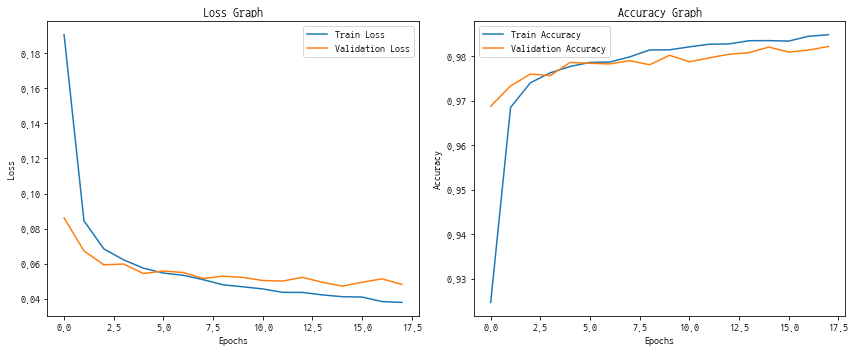

In [29]:
# 학습 그래프 그리기
plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()